## Introduction

Loan defaulting is a serious problem that affects both lenders and borrowers.Lenders lose money and trust when borrowers fail to repay their loans , while borrowers  suffer from damaged credit scores and legal consequences.Therefore, it is important to predict the likelihood of loan default  and take preventive measures to reduce the risk.
In this project we will use machine learning techniques to build a predictive model for loan default based on data from SuperLender, a local digital lending company.SuperLender uses data driven a data-driven  approach to assess the credit risk of its customers and determine  the two fundermental drivers of repayment; `willingness` and `ability`.We will explore hoiw SuperLender uses machine learning models to predict loan outcomes and evaluate their performance


# Data Understanding

We will make use of the datasets from Zindi, which is the largest professional network for data scientists in Africa.In particular we will be focusing on  3 different datasets for both train and test.

> a) Demographic data
* customerid(primary key)
* birthdate (date of birth of the customer)
* bank_account_type (type of primary bank account)
* latitude_gps / longitude_gps
* bank_name_clients (name of the bank)
* bank_branch_clients(location of the branch)
* employment_status_clients
* level_of_education_clients (highest level of education)

> b) Perfomance data
* customerid(primary key)
* systemloanid(id associated with the particular loan)
* loannumber(number of loan we are predicting)
* approveddate(date loan was approved)
* loan amount
* totaldue
* termdays
* refferedby
* good_bad_flag(good = settled loan on time; bad = did not settled loan on time)

> c) Previous loans data
* customerid
* systemloanid
* loannumber(the number of the loan that we will predict)
* approveddate
* creationdate(date the loan was created)
* loanamount
* totaldue
* closeddate
* refferedby
* firstduedate
* firstpaiddate


## Importing Libraries

In [1]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Loading the datasets
train_demographics = pd.read_csv("data/traindemographics.csv")
train_perf = pd.read_csv("data/trainperf.csv")
train_prev_loans = pd.read_csv("data/trainprevloans.csv")
test_demographics = pd.read_csv("data/testdemographics.csv")
test_perf = pd.read_csv("data/testperf.csv")
test_prev_loans = pd.read_csv("data/testprevloans.csv")


#### Loading the train data

In [3]:
train_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [4]:
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [5]:
train_prev_loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [6]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)


#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [7]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


### Merging the train data

In [8]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape

(18203, 29)

In [9]:
# Displaying the merged data dataset
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,...,level_of_education_clients,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,...,NaN,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,...,NaN,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good


In [13]:
# checking dataframe columns

print('dataframe columns:',merged_data.columns)

dataframe columns: Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate', 'birthdate', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')


In [12]:
# Getting statistics about the data

print("Stats about the data :", merged_data.describe())

Stats about the data :        systemloanid.prev  loannumber.prev  loanamount.prev  totaldue.prev  \
count       1.820300e+04     18203.000000     18203.000000   18203.000000   
mean        3.018396e+08         4.188211     16498.489260   19570.291924   
std         9.366865e+04         3.248957      9318.978101   10453.446786   
min         3.016001e+08         1.000000      3000.000000    3450.000000   
25%         3.017767e+08         2.000000     10000.000000   11500.000000   
50%         3.018552e+08         3.000000     10000.000000   13000.000000   
75%         3.019197e+08         6.000000     20000.000000   24500.000000   
max         3.020003e+08        26.000000     60000.000000   68100.000000   

       termdays.prev  longitude_gps  latitude_gps  systemloanid.perf  \
count   18203.000000   13693.000000  13693.000000       1.820300e+04   
mean       26.690655       4.482207      7.291442       3.019804e+08   
std        10.950075       8.639590      3.436232       1.342700e+0

In [14]:
#checking info of the data
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18203 entries, 0 to 18202
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  18203 non-null  object 
 1   systemloanid.prev           18203 non-null  int64  
 2   loannumber.prev             18203 non-null  int64  
 3   approveddate.prev           18203 non-null  object 
 4   creationdate.prev           18203 non-null  object 
 5   loanamount.prev             18203 non-null  float64
 6   totaldue.prev               18203 non-null  float64
 7   termdays.prev               18203 non-null  int64  
 8   closeddate                  18203 non-null  object 
 9   referredby.prev             1028 non-null   object 
 10  firstduedate                18203 non-null  object 
 11  firstrepaiddate             18203 non-null  object 
 12  birthdate                   13693 non-null  object 
 13  bank_account_type           136

In [3]:
#viewing the dataset info
train_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [4]:
#describing the dataset
train_prev_loans.describe(include='all')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
count,18183,1.818300e+04,18183.000000,18183,18183,18183.000000,18183.000000,18183.000000,18183,1026,18183,18183
unique,4359,NaN,NaN,18172,18173,NaN,NaN,NaN,17955,521,363,18011
top,8a858f7d5578012a01557ea194d94948,NaN,NaN,2016-06-07 22:49:34.000000,2017-05-19 10:23:18.000000,NaN,NaN,NaN,2016-11-07 00:53:42.000000,8a858fc55b2548dd015b286e452c678c,2017-07-03 00:00:00.000000,2016-09-06 00:00:00.000000
freq,26,NaN,NaN,2,2,NaN,NaN,NaN,5,14,398,7
mean,NaN,3.018395e+08,4.189353,NaN,NaN,16501.237420,19573.202931,26.692790,NaN,NaN,NaN,NaN
std,NaN,9.367767e+04,3.249490,NaN,NaN,9320.547516,10454.245277,10.946556,NaN,NaN,NaN,NaN
min,NaN,3.016001e+08,1.000000,NaN,NaN,3000.000000,3450.000000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,3.017766e+08,2.000000,NaN,NaN,10000.000000,11500.000000,15.000000,NaN,NaN,NaN,NaN
50%,NaN,3.018550e+08,3.000000,NaN,NaN,10000.000000,13000.000000,30.000000,NaN,NaN,NaN,NaN
75%,NaN,3.019197e+08,6.000000,NaN,NaN,20000.000000,24500.000000,30.000000,NaN,NaN,NaN,NaN


In [5]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858f965bb63a25015bbf63fd062e2e,1984-06-28 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [6]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858f965bb63a25015bbf63fd062e2e,1984-06-28 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [7]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [8]:
test_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


## Test Data

In [15]:
#test shape
print (test_demographics.shape)
print (test_perf. shape)
print (test_prev_loans.shape)

(1487, 9)
(1450, 9)
(5907, 12)


#### Merging the test data

In [16]:
# Merging the testing data
testing_data = pd.merge(test_prev_loans, test_demographics, on='customerid', how='left')
test_data = pd.merge(testing_data, test_perf, on='customerid', how='left')
test_data.shape

(5907, 28)

In [17]:
# Checking the columns
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [18]:
# loading the test data df
test_data

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,employment_status_clients,level_of_education_clients,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,...,NaN,NaN,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,...,NaN,NaN,301958882,4,21:10.0,21:04.0,20000,24500.0,30,8a858e4f5929c3df0159420645f46f55
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,...,NaN,NaN,301978934,3,30:57.0,29:45.0,10000,11500.0,15,NaN
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,...,NaN,NaN,301976435,2,35:44.0,35:38.0,10000,13000.0,30,NaN
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,...,NaN,NaN,301959556,4,01:39.0,01:33.0,20000,24500.0,30,NaN


In [18]:
# checking the columns
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [19]:
# checking shape of the test data
test_data.shape

(5907, 28)

# Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

#### Checking for Missing Values

In [20]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18099   99.428666
referredby.prev                      17175   94.352579
referredby.perf                      17175   94.352579
level_of_education_clients           14739   80.970170
employment_status_clients             5873   32.263913
longitude_gps                         4510   24.776136
latitude_gps                          4510   24.776136
bank_account_type                     4510   24.776136
birthdate                             4510   24.776136
bank_name_clients                     4510   24.776136
systemloanid.perf                        0    0.000000
approveddate.perf                        0    0.000000
creationdate.perf                        0    0.000000
loanamount.perf                          0    0.000000
totaldue.perf                            0    0.000000
termdays.perf                            0    0.000000


* `bank_branch_clients`  and `referredby`   have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [21]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients', 'referredby.prev', 'referredby.perf'], inplace=True)
                

In [22]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag'],
      dtype='object')

### Check for  Row Duplicates

In [23]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 40


## Dropping duplicates 

In [24]:
merged_data.drop_duplicates(inplace=True)

### Check for Data Consistency and Placeholders 

In [25]:
for column in merged_data.columns:
        
        unique_values = merged_data[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
        placeholder_count = len(placeholders)    
        unique_value_counts = merged_data[column].value_counts()    
        print(f"Column: '{column}'")
        print(f"Unique value counts:")
        print(unique_value_counts)
        print()
        print(f"Placeholders:")
        print(placeholders)
        print(f"Count of placeholders: {placeholder_count}\n")

Column: 'customerid'
Unique value counts:
8a858f7d5578012a01557ea194d94948    26
8a858e4456ced8470156d73452f85335    22
8a85886f54517ee0015470749d3c3ce7    21
8a858fa5552add5d0155536bd49343f9    21
8a858fe5569398920156a3a9a77b5d02    21
                                    ..
8a858e0059416900015946224e1779e9     1
8a858e505baa530d015baa644c9b0d58     1
8a858f995d32ae84015d3539f6585536     1
8a858f5e5cf45779015cf48983d61ef2     1
8a858ea75cef5535015cf37324bc186a     1
Name: customerid, Length: 4359, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'systemloanid.prev'
Unique value counts:
301795327    1
301892614    1
301882030    1
301814447    1
301808306    1
            ..
301919447    1
301884630    1
301858005    1
301976787    1
301924352    1
Name: systemloanid.prev, Length: 18183, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'loannumber.prev'
Unique value counts:
1     4344
2     2969
3     2300
4     1860
5     1535
6     1288
7     1036
8    

* The data does not have placeholders and there is consistency in the columns

##  Exploratory Data Analysis

#### Univariate Analysis

#### Setting up custom configuration settings for Matplotlib and Seaborn to control the appearance and style of plots

In [26]:

# settings for all images
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize": (9.7, 6.27),
}
sns.set_theme(style="white", palette=None, rc=custom_params)
sns.set_context("notebook", font_scale=1.0)

In [27]:
def pie(col, ax):
    data = col.value_counts().values
    lab = col.value_counts().index
    name = col.name
    ax.pie(data, autopct='%.0f%%')
    ax.set_title(f'{name} piechart')
    ax.legend(lab, bbox_to_anchor=(1, 1));

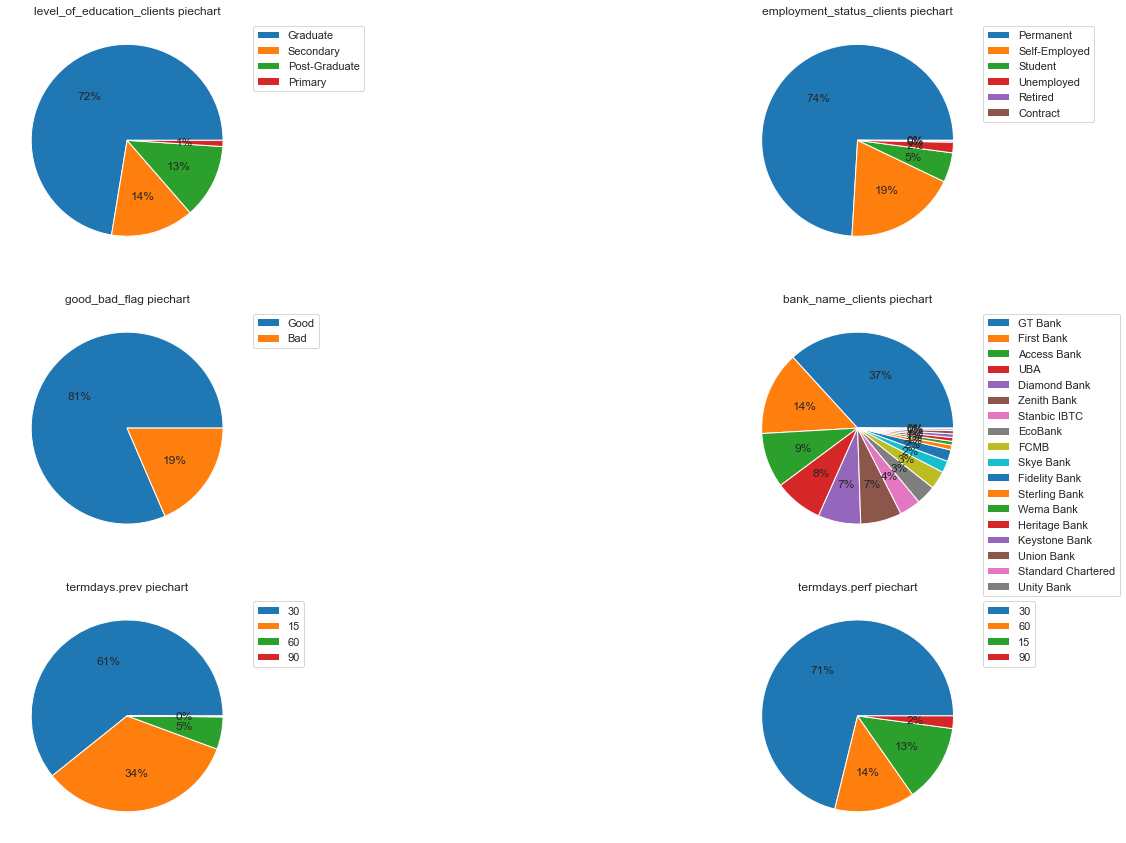

In [28]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 15))
pie_cols = ['level_of_education_clients', 'employment_status_clients', 'good_bad_flag', 'bank_name_clients', 'termdays.prev', 'termdays.perf']
for i, ax in enumerate(axs.flatten()):
    pie(merged_data[pie_cols[i]], ax)

#### Distribution of numeric variables

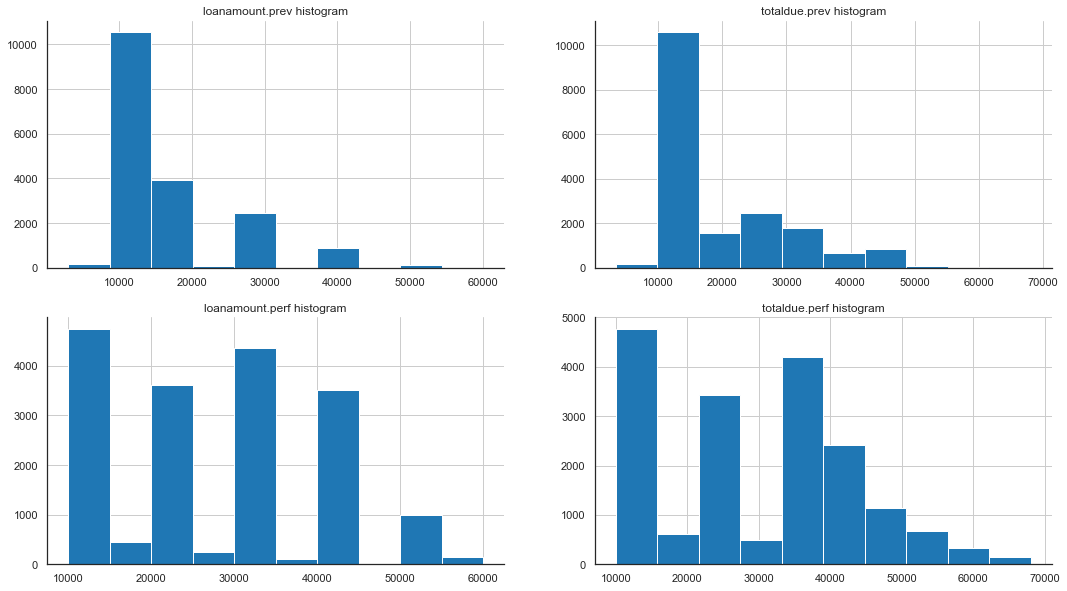

In [29]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))
hist_cols = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
for i, ax in enumerate(axs.flatten()):
    merged_data[hist_cols[i]].hist(ax=ax)
    ax.set_title(f'{hist_cols[i]} histogram')

#### Distribution of customers

In [30]:
import plotly.express as px

fig = px.scatter_mapbox(merged_data, lat='latitude_gps', lon='longitude_gps', zoom=10)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,  
    mapbox_center={"lat": merged_data['latitude_gps'].mean(), "lon": merged_data['longitude_gps'].mean()}  # Center the map around the data
)
fig.show()

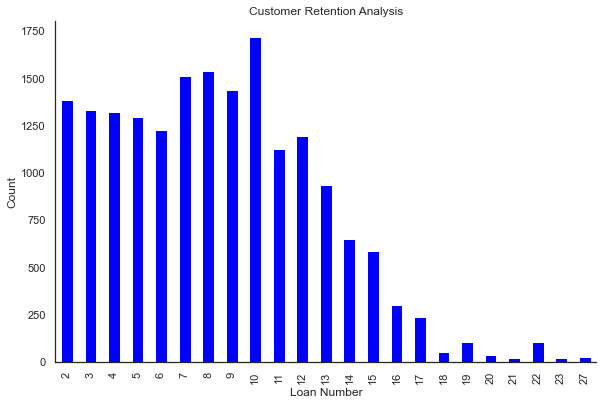

In [31]:
# Calculate customer retention
merged_data['retention'] = merged_data.groupby('customerid')['loannumber.perf'].transform('max')

# Countplot of customer retention
pd.crosstab(merged_data['loannumber.perf'], merged_data['retention']).plot(kind='bar', stacked=True, color='blue', legend=None)
plt.xlabel('Loan Number')
plt.ylabel('Count')
plt.title('Customer Retention Analysis')
plt.show()

* Customer Retention Analysis assesses the longevity of customer relationships with the loan service
*  Customers taking a loans from 2 to 12 indicate a strong relationship with the loan service since during this period customers return for multiple loans.
* The decrease in customer numbers after loan number 12 could be due to:
    1. Customers may have fulfilled their borrowing needs.
    2. Customers may have reached their credit limits that prevents them from taking out more loans
    3. Some customers may have been lost due to changing financial circumstances, or dissatisfaction with the service

#### Distribution of customers in different banks

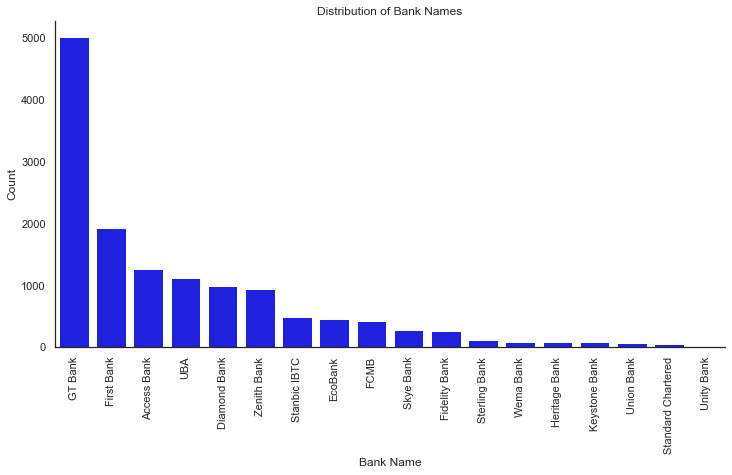

In [32]:
# Distribution of customers among different banks.
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='bank_name_clients',color='blue', order=merged_data['bank_name_clients'].value_counts().index)
plt.xlabel('Bank Name')
plt.ylabel('Count')
plt.title('Distribution of Bank Names')
plt.xticks(rotation=90)
plt.show()

### Bivariate EDA

Display of loan default rate

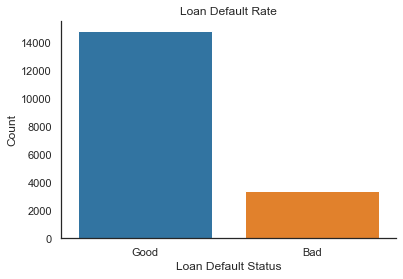

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_data, x='good_bad_flag')
plt.xlabel('Loan Default Status')
plt.ylabel('Count')
plt.title('Loan Default Rate')
plt.show()

Correlation matrix to understand the linear relationships between numerical variables and the target variable (good_bad_flag)

In [34]:


# Defined a function to identify numerical columns
def find_numeric_cols(df):
  # Select only the numeric columns
  numeric_cols = df.select_dtypes(include="number")
  # Get the column names as a list
  numeric_col_names = numeric_cols.columns.tolist()
  # Return the list of numeric column names
  return numeric_col_names


In [35]:
# Call the function to find numerical columns
numeric_col_names = find_numeric_cols(merged_data)

# Print the result
print("The numerical columns in the dataset are:")
print(numeric_col_names)

The numerical columns in the dataset are:
['systemloanid.prev', 'loannumber.prev', 'loanamount.prev', 'totaldue.prev', 'termdays.prev', 'longitude_gps', 'latitude_gps', 'systemloanid.perf', 'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf', 'retention']


### Correlation heatmap of high correlated features

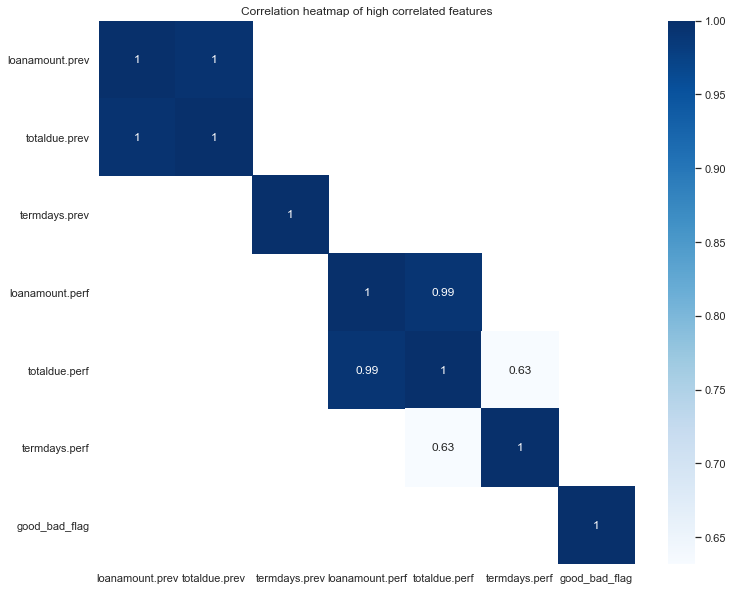

In [36]:
# Select the numerical columns and the target column
num_cols = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 
             'termdays.perf','birthdate']

target_col = "good_bad_flag"

# Convert the target column to a binary numeric column
merged_data[target_col] = merged_data[target_col].map({"Good": 1, "Bad": 0})

# Calculate the Pearson's correlation coefficients
corr_matrix = merged_data[num_cols + [target_col]].corr()

# Set the threshold value for high correlation
threshold = 0.6

# Filter the correlation matrix by the threshold value
high_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Plot the heatmap of the filtered matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation heatmap of high correlated features")
plt.show()


from the heatmap above we find that columns that exibit a high correlation with the target variable;
       - `totaldue.perf`
       -  `loanamount.prev`
       -  `approved_month`
       -  `month`
       -  `loanamount.perf`
       -  `totaldue.prev`
       -  `year`
       -  `month`



    -

#### Creating a contingency table of employment status and loan repayment status

In [37]:
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
print(cross_tab)

good_bad_flag                 0     1
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179


<Figure size 1080x720 with 0 Axes>

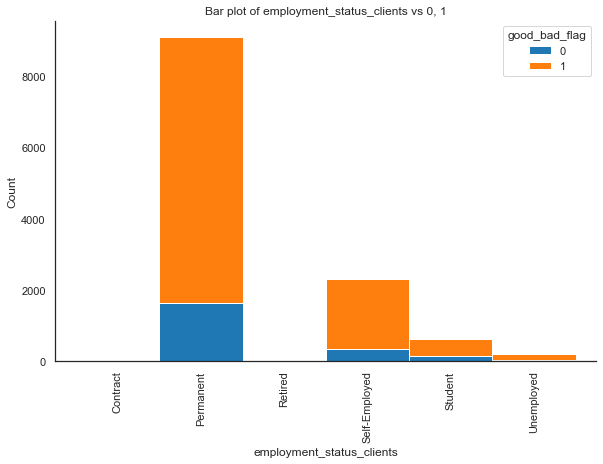

In [38]:
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    # Use width=1 to make the bars touch each other
    crosstab.plot(kind='bar', stacked=True, width=1)

    # Add labels and title
    plt.xlabel(crosstab.index.name)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + crosstab.index.name + ' vs ' + ', '.join([str(x) for x in crosstab.columns]))

    # Show the plot
    plt.show()

# merged_data  as the dataframe 
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
plot_crosstab(cross_tab)


In [39]:
# Calculate the mean loan amount and term days for each group
mean_loan_amount = merged_data.groupby("good_bad_flag")["loanamount.perf"].mean()
mean_term_days = merged_data.groupby("good_bad_flag")["termdays.perf"].mean()

# Print the results
print("Mean loan amount by loan performance:")
print(mean_loan_amount)
print("Mean term days by loan performance:")
print(mean_term_days)

# Create a cross-tabulation table for employment status and loan performance
ct_employment = pd.crosstab(merged_data["employment_status_clients"], merged_data["good_bad_flag"])

# Print the results
print("Cross-tabulation of employment status and loan performance:")
print(ct_employment)

# Create a cross-tabulation table for level of education and loan performance
ct_education = pd.crosstab(merged_data["level_of_education_clients"], merged_data["good_bad_flag"])

# Print the results
print("Cross-tabulation of level of education and loan performance:")
print(ct_education)

Mean loan amount by loan performance:
good_bad_flag
0    22790.973872
1    26316.571043
Name: loanamount.perf, dtype: float64
Mean term days by loan performance:
good_bad_flag
0    33.852435
1    33.228822
Name: termdays.perf, dtype: float64
Cross-tabulation of employment status and loan performance:
good_bad_flag                 0     1
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179
Cross-tabulation of level of education and loan performance:
good_bad_flag                 0     1
level_of_education_clients           
Graduate                    415  2093
Post-Graduate                89   346
Primary                       1    35
Secondary                   120   365


from the above analysis we found out that;
   - The majority of the customers are permanent employees, followed by self-employed, students, unemployed, retired and contract workers. The proportion   of good customers is higher than bad customers in every employment category, except for contract workers, who have no bad customers at all. This indicates that employment status is an important factor for loan performance.
   - Customers who have good loan performance tend to borrow more money than those who have bad loan performance. The mean loan amount for good customers is 26316.57 while the mean loan amount for bad customers is 22790.97. This suggests that good customers have higher income or creditworthiness than bad customers
   - The level of education of the customers is mostly graduate, followed by secondary, post-graduate and primary. The proportion of good customers is higher than bad customers in every education level, except for primary, who have only one bad customer and 35 good customers. This suggests that level of education is also a relevant factor for loan performance
   - The mean term days for both groups are similar, around 33 days. This means that the duration of the loan does not have a significant impact on the loan performance.

### Visualizing and measuring the relationship between previous and current loan amounts

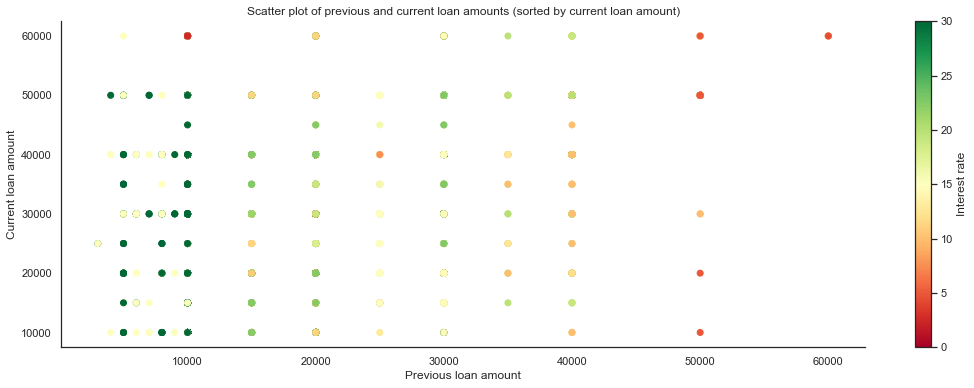

The correlation coefficient between previous and current loan amounts is 0.57


In [40]:

# Create interest_rate column using totaldue.prev and loanamount.prev
merged_data["interest_rate"] = (merged_data["totaldue.prev"] - merged_data["loanamount.prev"]) / merged_data["loanamount.prev"] * 100

# Scatter plot
plt.figure(figsize=(18,6))

# Sort the dataframe by current loan amount in descending order
sorted_data = merged_data.sort_values(by="loanamount.perf", ascending=False)

# Plot the scatter plot using the sorted dataframe
plt.scatter(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"], c=sorted_data["interest_rate"], cmap="RdYlGn")
plt.xlabel("Previous loan amount")
plt.ylabel("Current loan amount")
plt.title("Scatter plot of previous and current loan amounts (sorted by current loan amount)")
plt.colorbar(label="Interest rate")
plt.show()

# Correlation coefficient
corr = np.corrcoef(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"])[0,1]
print(f"The correlation coefficient between previous and current loan amounts is {corr:.2f}")

the interest rate charged on a loan reflects the implied probability of default, assuming a zero recovery rate.This means that the higher the interest rate, the higher the risk of default that the lender expects.


The red points indicate high interest rates and high risk of default, while the green points indicate low interest rates and low risk of default.
We can see that there is a negative correlation between the previous and current loan amounts and the interest rate, meaning that borrowers who have larger loans tend to have lower interest rates and lower risk of default.



### Creating a time series line plot of monthly loan payment trend

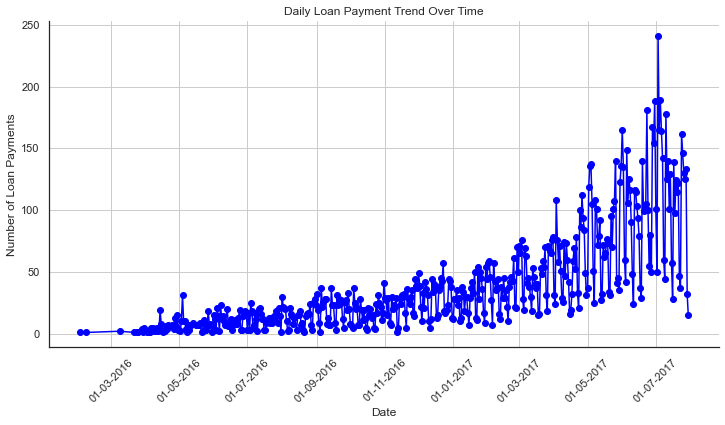

In [41]:

# Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

# Create a new column called 'date' that contains only the date part of 'firstrepaiddate'
merged_data['date'] = merged_data['firstrepaiddate'].dt.date

# Group data by date and count the number of loan payments
daily_payment_counts = merged_data.groupby('date')['firstrepaiddate'].count().reset_index()

# Create a time series line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_payment_counts['date'], daily_payment_counts['firstrepaiddate'], marker='o', linestyle='-', color='b')
plt.title('Daily Loan Payment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Loan Payments')
plt.grid(True)

# Format the x-axis labels as day, month, and year
myFmt = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=45)

plt.show()


- From the graph we conclude that their is an increase in trend in monthly loan repayment overtime most loans are bieng repayed over the course of the month

## Data preprocessing

In [42]:
merged_data.isna().sum()

customerid                        0
systemloanid.prev                 0
loannumber.prev                   0
approveddate.prev                 0
creationdate.prev                 0
loanamount.prev                   0
totaldue.prev                     0
termdays.prev                     0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
birthdate                      4510
bank_account_type              4510
longitude_gps                  4510
latitude_gps                   4510
bank_name_clients              4510
employment_status_clients      5873
level_of_education_clients    14719
systemloanid.perf                 0
loannumber.perf                   0
approveddate.perf                 0
creationdate.perf                 0
loanamount.perf                   0
totaldue.perf                     0
termdays.perf                     0
good_bad_flag                     0
retention                         0
interest_rate               

In [43]:
# Dropping rows with missing values

merged_data.dropna(axis=0,inplace=True)
merged_data.isna().sum()


customerid                    0
systemloanid.prev             0
loannumber.prev               0
approveddate.prev             0
creationdate.prev             0
loanamount.prev               0
totaldue.prev                 0
termdays.prev                 0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
systemloanid.perf             0
loannumber.perf               0
approveddate.perf             0
creationdate.perf             0
loanamount.perf               0
totaldue.perf                 0
termdays.perf                 0
good_bad_flag                 0
retention                     0
interest_rate                 0
date                          0
dtype: int64

In [44]:
# Calculating the age of the customers
# Importing the relevant column
from datetime import datetime

merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'])
merged_data['approveddate.perf'] = pd.to_datetime(merged_data['approveddate.perf'])
merged_data['age'] = (merged_data['approveddate.perf'] - merged_data['birthdate']).astype('<m8[Y]')
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,firstduedate,...,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,good_bad_flag,retention,interest_rate,date,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14,...,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1,12,30.0,2016-09-01,45.0
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30,...,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1,12,30.0,2017-05-26,45.0
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04,...,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1,12,19.0,2017-04-26,45.0
5,8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,2017-04-05,...,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,1,9,19.0,2017-04-04,30.0
6,8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,2017-07-04,...,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,1,9,30.0,2017-07-03,30.0


In [46]:
# Convert date columns to datetime objects
date_columns = ['approveddate.prev', 'creationdate.prev', 'approveddate.perf', 'creationdate.perf']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], format='%Y-%m-%d %H:%M:%S.%f')

# Calculate time differences and convert to minutes
merged_data['time_to_approval.prev'] = (merged_data['approveddate.prev'] - merged_data['creationdate.prev']).dt.total_seconds() / 60
merged_data['time_to_approval.perf'] = (merged_data['approveddate.perf'] - merged_data['creationdate.perf']).dt.total_seconds() / 60

In [47]:
my_df = merged_data.drop(['longitude_gps','latitude_gps','approveddate.prev','creationdate.prev',
                          'approveddate.perf','creationdate.perf','date','firstrepaiddate', 'birthdate','closeddate', 'firstduedate'],axis = 1)
my_df.head()

,customerid,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,...,loannumber.perf,loanamount.perf,totaldue.perf,termdays.perf,good_bad_flag,retention,interest_rate,age,time_to_approval.prev,time_to_approval.perf
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,10000.0,13000.0,30,Other,Diamond Bank,Permanent,Post-Graduate,...,12,30000.0,34500.0,30,1,12,30.0,45.0,60.133333,60.15
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,10000.0,13000.0,30,Other,Diamond Bank,Permanent,Post-Graduate,...,12,30000.0,34500.0,30,1,12,30.0,45.0,60.233333,60.15
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,20000.0,23800.0,30,Other,Diamond Bank,Permanent,Post-Graduate,...,12,30000.0,34500.0,30,1,12,19.0,45.0,60.100000,60.15
5,8a858970548359cc0154883481981866,301832407,5,20000.0,23800.0,30,Other,GT Bank,Permanent,Primary,...,9,40000.0,44000.0,30,1,9,19.0,30.0,60.116667,60.10
6,8a858970548359cc0154883481981866,301926513,8,30000.0,39000.0,60,Other,GT Bank,Permanent,Primary,...,9,40000.0,44000.0,30,1,9,30.0,30.0,60.116667,60.10


In [48]:
my_df['employment_status_clients'].value_counts()

Permanent        2075
Self-Employed    1075
Student           186
Unemployed        102
Retired            12
Name: employment_status_clients, dtype: int64

In [49]:
# Creating a function to indicate whether employed or not
def status(value):
    if value == 'Unemployed' or value == 'Student':
        return 0
    else:
        return 1

In [50]:
my_df['Stable_income'] = my_df['employment_status_clients'].map(status)
my_df.drop(columns=['employment_status_clients'], inplace=True)

In [51]:
my_df['Stable_income'].value_counts()

1    3162
0     288
Name: Stable_income, dtype: int64

In [52]:
# Checking columns
my_df.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'bank_account_type',
       'bank_name_clients', 'level_of_education_clients', 'systemloanid.perf',
       'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf',
       'good_bad_flag', 'retention', 'interest_rate', 'age',
       'time_to_approval.prev', 'time_to_approval.perf', 'Stable_income'],
      dtype='object')

In [ ]:
# # Employment History:
# # Create categorical features based on employment stability
# merged_data['employment_stability'] = 'Unknown'

# # Categorize into 'Stable,' 'Unstable,' and 'Unknown'
# merged_data.loc[merged_data['employment_status_clients'].isin(['Permanent', 'Retired']), 'employment_stability'] = 'Stable'
# merged_data.loc[merged_data['employment_status_clients'].isin(['Self-Employed', 'Contract']), 'employment_stability'] = 'Unstable'

# # Drop the original 'employment_status_clients' column if no longer needed
# merged_data.drop(columns=['employment_status_clients'], inplace=True)

In [ ]:
# merged_data['employment_stability'].value_counts()

### Creating Dummies

In [53]:
df_with_dummies = pd.get_dummies(my_df,drop_first=True)
df_with_dummies.head()

,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,systemloanid.perf,loannumber.perf,loanamount.perf,totaldue.perf,termdays.perf,...,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary
0,301682320,2,10000.0,13000.0,30,301994762,12,30000.0,34500.0,30,...,0,0,0,0,0,0,0,1,0,0
1,301883808,9,10000.0,13000.0,30,301994762,12,30000.0,34500.0,30,...,0,0,0,0,0,0,0,1,0,0
2,301831714,8,20000.0,23800.0,30,301994762,12,30000.0,34500.0,30,...,0,0,0,0,0,0,0,1,0,0
5,301832407,5,20000.0,23800.0,30,301962360,9,40000.0,44000.0,30,...,0,0,0,0,0,0,0,0,1,0
6,301926513,8,30000.0,39000.0,60,301962360,9,40000.0,44000.0,30,...,0,0,0,0,0,0,0,0,1,0


In [54]:
df_with_dummies.columns

Index(['systemloanid.prev', 'loannumber.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'systemloanid.perf',
       'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf',
       ...
       'bank_name_clients_Stanbic IBTC',
       'bank_name_clients_Standard Chartered',
       'bank_name_clients_Sterling Bank', 'bank_name_clients_UBA',
       'bank_name_clients_Union Bank', 'bank_name_clients_Wema Bank',
       'bank_name_clients_Zenith Bank',
       'level_of_education_clients_Post-Graduate',
       'level_of_education_clients_Primary',
       'level_of_education_clients_Secondary'],
      dtype='object', length=475)

In [35]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 0 to 18202
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  18183 non-null  object        
 1   systemloanid.prev           18183 non-null  int64         
 2   loannumber.prev             18183 non-null  int64         
 3   approveddate.prev           18183 non-null  object        
 4   creationdate.prev           18183 non-null  object        
 5   loanamount.prev             18183 non-null  float64       
 6   totaldue.prev               18183 non-null  float64       
 7   termdays.prev               18183 non-null  int64         
 8   closeddate                  18183 non-null  object        
 9   firstduedate                18183 non-null  datetime64[ns]
 10  firstrepaiddate             18183 non-null  datetime64[ns]
 11  birthdate                   13673 non-null  object    

## Dealing with missing values

In [36]:
merged_data.isna().sum()


customerid                        0
systemloanid.prev                 0
loannumber.prev                   0
approveddate.prev                 0
creationdate.prev                 0
loanamount.prev                   0
totaldue.prev                     0
termdays.prev                     0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
birthdate                      4510
bank_account_type              4510
longitude_gps                  4510
latitude_gps                   4510
bank_name_clients              4510
employment_status_clients      5873
level_of_education_clients    14719
systemloanid.perf                 0
loannumber.perf                   0
approveddate.perf                 0
creationdate.perf                 0
loanamount.perf                   0
totaldue.perf                     0
termdays.perf                     0
good_bad_flag                     0
interest_rate                     0
date                        

For `level_of_education_clients,employment_status_clients,bank_name_clients,birthdate and bank_account_type`  (categorical features), we'll manually fill this in with "missing" labels

In [37]:
merged_data = merged_data.copy()
merged_data.fillna({"level_of_education_clients":"level_of_education_clients_missing", 
                        "employment_status_clients":"employment_status_clients_missing",
                        "bank_name_clients":"bank_name_clients_missing","birthdate":"birthdate_missing","bank_account_type":"bank_account_type_missing"}, inplace=True)
merged_data.isna().sum()

customerid                       0
systemloanid.prev                0
loannumber.prev                  0
approveddate.prev                0
creationdate.prev                0
loanamount.prev                  0
totaldue.prev                    0
termdays.prev                    0
closeddate                       0
firstduedate                     0
firstrepaiddate                  0
birthdate                        0
bank_account_type                0
longitude_gps                 4510
latitude_gps                  4510
bank_name_clients                0
employment_status_clients        0
level_of_education_clients       0
systemloanid.perf                0
loannumber.perf                  0
approveddate.perf                0
creationdate.perf                0
loanamount.perf                  0
totaldue.perf                    0
termdays.perf                    0
good_bad_flag                    0
interest_rate                    0
date                             0
dtype: int64

For `longitude_gps` and `latitude_gps` ( numeric features), we'll use a SimpleImputer from scikit-learn to fill in the mean

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

imputer.fit(merged_data[["latitude_gps"]])
latitude_imputed = pd.DataFrame(
    imputer.transform(merged_data[["latitude_gps"]]),
    # index is important to ensure we can concatenate with other columns
    index=merged_data.index,
    columns=["latitude_gps",]
)

merged_data["latitude_gps"] = latitude_imputed
merged_data.isna().sum()

customerid                       0
systemloanid.prev                0
loannumber.prev                  0
approveddate.prev                0
creationdate.prev                0
loanamount.prev                  0
totaldue.prev                    0
termdays.prev                    0
closeddate                       0
firstduedate                     0
firstrepaiddate                  0
birthdate                        0
bank_account_type                0
longitude_gps                 4510
latitude_gps                     0
bank_name_clients                0
employment_status_clients        0
level_of_education_clients       0
systemloanid.perf                0
loannumber.perf                  0
approveddate.perf                0
creationdate.perf                0
loanamount.perf                  0
totaldue.perf                    0
termdays.perf                    0
good_bad_flag                    0
interest_rate                    0
date                             0
dtype: int64

In [39]:
imputer = SimpleImputer()

imputer.fit(merged_data[["longitude_gps"]])
latitude_imputed = pd.DataFrame(
    imputer.transform(merged_data[["longitude_gps"]]),
    # index is important to ensure we can concatenate with other columns
    index=merged_data.index,
    columns=["latitude_gps",]
)

merged_data["longitude_gps"] = latitude_imputed
merged_data.isna().sum()

customerid                    0
systemloanid.prev             0
loannumber.prev               0
approveddate.prev             0
creationdate.prev             0
loanamount.prev               0
totaldue.prev                 0
termdays.prev                 0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
systemloanid.perf             0
loannumber.perf               0
approveddate.perf             0
creationdate.perf             0
loanamount.perf               0
totaldue.perf                 0
termdays.perf                 0
good_bad_flag                 0
interest_rate                 0
date                          0
dtype: int64

In [40]:
# checking if missing values have been delt with
merged_data.isna().sum()

customerid                    0
systemloanid.prev             0
loannumber.prev               0
approveddate.prev             0
creationdate.prev             0
loanamount.prev               0
totaldue.prev                 0
termdays.prev                 0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
systemloanid.perf             0
loannumber.perf               0
approveddate.perf             0
creationdate.perf             0
loanamount.perf               0
totaldue.perf                 0
termdays.perf                 0
good_bad_flag                 0
interest_rate                 0
date                          0
dtype: int64

In [41]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag', 'interest_rate',
       'date'],
      dtype='object')

In [42]:
# checking for categorical columns in the dataset

def find_categorical_columns(df):
  # select the columns that have object or category data type
  cat_cols = df.select_dtypes(include=['object', 'category']).columns
  # return the list of column names
  return list(cat_cols)
 
# call the function
cat_cols = find_categorical_columns(merged_data)
# print the result
print(f'The categorical columns are {cat_cols}')

The categorical columns are ['customerid', 'approveddate.prev', 'creationdate.prev', 'closeddate', 'birthdate', 'bank_account_type', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients', 'approveddate.perf', 'creationdate.perf', 'date']


In [43]:
# checking which categorical features are highly correlated with the target feature

# Filter the DataFrame to include only categorical features
categorical_features = merged_data.select_dtypes(include=['object'])

# Calculate the correlation of each categorical feature with the target variable
categorical_correlations = {}
for feature in categorical_features.columns:
    correlation = merged_data.groupby(feature)['good_bad_flag'].mean().abs()
    categorical_correlations[feature] = correlation.max()

# Sort categorical features by their correlation with the target variable (absolute value)
sorted_categorical_features = sorted(categorical_correlations.items(), key=lambda x: x[1], reverse=True)

# Select the top N categorical features based on correlation
top_categorical_features = sorted_categorical_features[:26]

# Print the selected categorical features
print(top_categorical_features)


[('customerid', 1), ('approveddate.prev', 1.0), ('creationdate.prev', 1.0), ('closeddate', 1.0), ('birthdate', 1.0), ('employment_status_clients', 1.0), ('approveddate.perf', 1), ('creationdate.perf', 1.0), ('date', 1.0), ('level_of_education_clients', 0.9722222222222222), ('bank_account_type', 0.9545454545454546), ('bank_name_clients', 0.9545454545454546)]


In [44]:
#one hot encoding  the categorical columns
# Select the categorical columns
cat_cols = merged_data[['customerid', 'approveddate.prev', 'creationdate.prev', 'closeddate', 'birthdate', 'bank_account_type', 'bank_name_clients', 
                        'employment_status_clients', 'level_of_education_clients', 'approveddate.perf', 'creationdate.perf', ]]

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(cat_cols)

# Print the one-hot encoded DataFrame
print(one_hot_encoded)

       customerid_8a1088a0484472eb01484669e3ce4e0b  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
18198                                            0   
18199                                            0   
18200                                            0   
18201                                            0   
18202                                            0   

       customerid_8a1a1e7e4f707f8b014f797718316cad  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                        

In [45]:
# Concatenate the one-hot encoded DataFrame with the main DataFrame
df_encoded = pd.concat([merged_data, one_hot_encoded], axis=1)
df_encoded.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,firstduedate,...,creationdate.perf_2017-07-30 17:59:17.000000,creationdate.perf_2017-07-30 18:14:41.000000,creationdate.perf_2017-07-30 19:32:27.000000,creationdate.perf_2017-07-30 19:33:38.000000,creationdate.perf_2017-07-30 20:55:09.000000,creationdate.perf_2017-07-30 21:05:06.000000,creationdate.perf_2017-07-30 21:11:46.000000,creationdate.perf_2017-07-30 21:15:23.000000,creationdate.perf_2017-07-30 21:48:49.000000,creationdate.perf_2017-07-30 21:55:43.000000
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14,...,0,0,0,0,0,0,0,0,0,0
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30,...,0,0,0,0,0,0,0,0,0,0
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04,...,0,0,0,0,0,0,0,0,0,0
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,2017-04-24,...,0,0,0,0,0,0,0,0,0,0
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,2017-07-03,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Dropping  the categorical columns  from the data 
df_encoded = df_encoded.drop(['customerid', 'approveddate.prev', 'creationdate.prev', 'closeddate', 'birthdate', 'bank_account_type', 'bank_name_clients', 
                        'employment_status_clients', 'level_of_education_clients', 'approveddate.perf', 'creationdate.perf'], axis=1)
df_encoded.head()

,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,firstduedate,firstrepaiddate,longitude_gps,latitude_gps,systemloanid.perf,...,creationdate.perf_2017-07-30 17:59:17.000000,creationdate.perf_2017-07-30 18:14:41.000000,creationdate.perf_2017-07-30 19:32:27.000000,creationdate.perf_2017-07-30 19:33:38.000000,creationdate.perf_2017-07-30 20:55:09.000000,creationdate.perf_2017-07-30 21:05:06.000000,creationdate.perf_2017-07-30 21:11:46.000000,creationdate.perf_2017-07-30 21:15:23.000000,creationdate.perf_2017-07-30 21:48:49.000000,creationdate.perf_2017-07-30 21:55:43.000000
0,301682320,2,10000.0,13000.0,30,2016-09-14,2016-09-01 15:51:43,3.43201,6.433055,301994762,...,0,0,0,0,0,0,0,0,0,0
1,301883808,9,10000.0,13000.0,30,2017-05-30,2017-05-26 00:00:00,3.43201,6.433055,301994762,...,0,0,0,0,0,0,0,0,0,0
2,301831714,8,20000.0,23800.0,30,2017-04-04,2017-04-26 22:03:47,3.43201,6.433055,301994762,...,0,0,0,0,0,0,0,0,0,0
3,301861541,5,10000.0,11500.0,15,2017-04-24,2017-04-24 00:48:43,11.13935,10.292041,301966580,...,0,0,0,0,0,0,0,0,0,0
4,301941754,2,10000.0,11500.0,15,2017-07-03,2017-07-14 21:08:35,3.98577,7.491708,301999343,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Defining X and y
y = df_encoded['good_bad_flag']
X = df_encoded.drop('good_bad_flag', axis=1)#dropping the target colun from the main dataframe

In [48]:
#checking  X Dataframe data types
X.dtypes

systemloanid.prev                                 int64
loannumber.prev                                   int64
loanamount.prev                                 float64
totaldue.prev                                   float64
termdays.prev                                     int64
                                                 ...   
creationdate.perf_2017-07-30 21:05:06.000000      uint8
creationdate.perf_2017-07-30 21:11:46.000000      uint8
creationdate.perf_2017-07-30 21:15:23.000000      uint8
creationdate.perf_2017-07-30 21:48:49.000000      uint8
creationdate.perf_2017-07-30 21:55:43.000000      uint8
Length: 70054, dtype: object

In [49]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
categorical_columns


Index(['date'], dtype='object')

In [50]:
X = X.drop(columns=['date'])
X

,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,firstduedate,firstrepaiddate,longitude_gps,latitude_gps,systemloanid.perf,...,creationdate.perf_2017-07-30 17:59:17.000000,creationdate.perf_2017-07-30 18:14:41.000000,creationdate.perf_2017-07-30 19:32:27.000000,creationdate.perf_2017-07-30 19:33:38.000000,creationdate.perf_2017-07-30 20:55:09.000000,creationdate.perf_2017-07-30 21:05:06.000000,creationdate.perf_2017-07-30 21:11:46.000000,creationdate.perf_2017-07-30 21:15:23.000000,creationdate.perf_2017-07-30 21:48:49.000000,creationdate.perf_2017-07-30 21:55:43.000000
0,301682320,2,10000.0,13000.0,30,2016-09-14,2016-09-01 15:51:43,3.432010,6.433055,301994762,...,0,0,0,0,0,0,0,0,0,0
1,301883808,9,10000.0,13000.0,30,2017-05-30,2017-05-26 00:00:00,3.432010,6.433055,301994762,...,0,0,0,0,0,0,0,0,0,0
2,301831714,8,20000.0,23800.0,30,2017-04-04,2017-04-26 22:03:47,3.432010,6.433055,301994762,...,0,0,0,0,0,0,0,0,0,0
3,301861541,5,10000.0,11500.0,15,2017-04-24,2017-04-24 00:48:43,11.139350,10.292041,301966580,...,0,0,0,0,0,0,0,0,0,0
4,301941754,2,10000.0,11500.0,15,2017-07-03,2017-07-14 21:08:35,3.985770,7.491708,301999343,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,301611754,2,10000.0,13000.0,30,2016-05-16,2016-05-13 18:05:07,3.378536,6.548313,301971504,...,0,0,0,0,0,0,0,0,0,0
18199,301761267,9,30000.0,34400.0,30,2016-12-19,2016-12-13 15:53:48,3.378536,6.548313,301971504,...,0,0,0,0,0,0,0,0,0,0
18200,301631653,4,10000.0,13000.0,30,2016-07-12,2016-07-09 15:23:56,3.378536,6.548313,301971504,...,0,0,0,0,0,0,0,0,0,0
18201,301697691,1,10000.0,13000.0,30,2016-09-26,2016-10-15 10:02:45,4.478997,7.290004,301996908,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X.columns

Index(['systemloanid.prev', 'loannumber.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'firstduedate', 'firstrepaiddate',
       'longitude_gps', 'latitude_gps', 'systemloanid.perf',
       ...
       'creationdate.perf_2017-07-30 17:59:17.000000',
       'creationdate.perf_2017-07-30 18:14:41.000000',
       'creationdate.perf_2017-07-30 19:32:27.000000',
       'creationdate.perf_2017-07-30 19:33:38.000000',
       'creationdate.perf_2017-07-30 20:55:09.000000',
       'creationdate.perf_2017-07-30 21:05:06.000000',
       'creationdate.perf_2017-07-30 21:11:46.000000',
       'creationdate.perf_2017-07-30 21:15:23.000000',
       'creationdate.perf_2017-07-30 21:48:49.000000',
       'creationdate.perf_2017-07-30 21:55:43.000000'],
      dtype='object', length=70053)

In [52]:
from sklearn.preprocessing import StandardScaler
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

# Exclude non-numeric columns from X
X_numeric = X.drop(columns=non_numeric_columns)

# Scale the numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Print the scaled DataFrame
print(X_scaled_df)


       systemloanid.prev  loannumber.prev  loanamount.prev  totaldue.prev  \
0              -1.677650        -0.673771        -0.697536      -0.628776   
1               0.473274         1.480472        -0.697536      -0.628776   
2              -0.082840         1.172723         0.375392       0.404325   
3               0.235569         0.249476        -0.697536      -0.772263   
4               1.091859        -0.673771        -0.697536      -0.772263   
...                  ...              ...              ...            ...   
18178          -2.430956        -0.673771        -0.697536      -0.628776   
18179          -0.834875         1.480472         1.448320       1.418295   
18180          -2.218530        -0.058273        -0.697536      -0.628776   
18181          -1.513561        -0.981520        -0.697536      -0.628776   
18182          -1.326062        -0.673771        -0.697536      -0.628776   

       termdays.prev  longitude_gps  latitude_gps  systemloanid.perf  \
0  

In [53]:
y.dtype

dtype('int64')

In [54]:
from  sklearn.model_selection import train_test_split

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y, test_size=0.3, random_state=42)

print('completed splitting data')

completed splitting data


In [55]:
from sklearn.linear_model import LogisticRegression

# instantiating logistic regression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [56]:
# Making predictions
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
# model evaluataion
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report

#check for accuracy score
def model_accuracy(y_pred, y_test):
    return accuracy_score(y_pred, y_test)
    
#call the function

print(model_accuracy(y_pred, y_test))

0.5121906507791018


In [58]:
 # Calculate classification report
classification_metrics = classification_report(y_test, y_pred)

# Print the classification report
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.23      0.69      0.35      1030
           1       0.87      0.47      0.61      4425

    accuracy                           0.51      5455
   macro avg       0.55      0.58      0.48      5455
weighted avg       0.75      0.51      0.56      5455



- Generally the model appears to have better performance in predicting Class 1 (the positive class) compared to Class 0 (the negative class). This is evident from the higher precision and recall for Class 1. However, the recall for Class 1 is still relatively low, indicating that there is room for improvement in identifying actual positive cases.I went further and performed a gridsearch cv and handled class imbalance to see if the model can improve its performance

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logit', LogisticRegression(solver='liblinear', random_state=42))  # Logistic Regression model
])

# Define the parameter grid for grid search
param_grid = {
    'logit__C': [0.1, 1, 10],  # Regularization parameter
    'logit__penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
}

# Create GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Access the best model from the grid search
best_model = grid_search.best_estimator_

# Instantiate SMOTE with random_state=42 and sampling_strategy='auto'
sm = SMOTE(random_state=42, sampling_strategy="auto")

# Fit and transform X_train and y_train using SMOTE
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

# Fit the best model on the oversampled training data
best_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the training set using the best model
y_pred_best = best_model.predict(X_train_oversampled)


Best Parameters: {'logit__C': 0.1, 'logit__penalty': 'l1'}
Best Cross-Validation Score: 0.8163105004483816


- After performing grid search cv the i got  this are the best parameters  Best Parameters: {'logit__C': 0.1, 'logit__penalty': 'l1'}
Best Cross-Validation Score: 0.8163105004483816 i went further retrained this on my model to se if it can improve the model performance

### best model 

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Retrain the model with the best hyperparameters on the original training data
best_model = LogisticRegression(
    C=0.1,           # Best regularization strength
    penalty='l1',   # Best penalty type
    solver='liblinear',  # Solver for logistic regression
    random_state=42
)

# Fit the model on the original training data
best_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the validation or test set
y_pred = best_model.predict(X_test)  

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.24      0.63      0.35      1030
           1       0.86      0.53      0.66      4425

    accuracy                           0.55      5455
   macro avg       0.55      0.58      0.50      5455
weighted avg       0.74      0.55      0.60      5455

Accuracy: 0.5501374885426215
